# **Visualisation of cell trajectory on CTC datasets**
This is a notebook that can generate figures and 3D models presenting cell trajectories generated by feature extraction and then the inference step in the GNN approach to cell tracking.
After using our GNN notebook's feature extraction step, the ```all_data_df.csv``` file containing cell centroids and features per frame can be pointed to here to generate figures of cell trajectories.
```
PROJECT/
├── (INPUT) data/
│   └── dataset_name
└── (OUTPUT) gnn_out/
    └── inference_results/
        └── dataset_name/
            ├── [01/02]_CSV
            ├── [01/02]_RES_inference
            │   └── all_data_df.csv
            └── RES_inference
```

In [ ]:
import os
ROOT = "/content/drive/MyDrive/PROJECT"
DATASET_NAME = "Fluo_C2DL_Huh7" # Update to correspond to data being used
DATA_FOLDER = os.path.join(ROOT, "data", DATASET_NAME)
OUT_FOLDER = os.path.join(ROOT, "gnn_out")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### REQUIRED PACKAGES & PRE-REQUISITE TASKS

In [ ]:
!pip install matplotlib
!pip install opencv-python
!pip install pandas
!pip install numpy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#data frame
df_path = os.path.join(OUT_FOLDER, "inference_results", DATASET_NAME, "01_RES_inference")
df = pd.read_csv(df_path + "/all_data_df.csv")

In [ ]:
def ensure_dir(path, message=None):
    if not os.path.isdir(path):
        if message:
            print(message)
        os.makedirs(path, exist_ok=True)

VISUALISATION_FOLDER = os.path.join(OUT_FOLDER, "visualisation", DATASET_NAME)
ensure_dir(VISUALISATION_FOLDER, "Visualisation folder not present in drive. Creating now.")

## 2D Graph Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

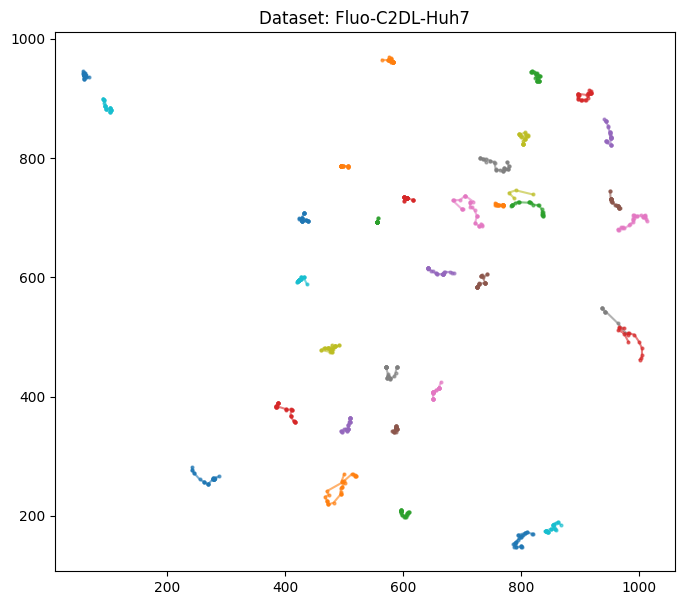

In [ ]:
fig, ax = plt.subplots(figsize = (8, 7))
plt.style.use("dark_background")

labels = df["seg_label"].unique()
num_cell = len(labels)
#print(num_cell)

for i, l in enumerate(labels):
    track = df[df["seg_label"] == l].sort_values("frame_num")
    ax.plot(track["centroid_col"], track["centroid_row"], marker = "o", markersize = 2,
            linestyle = "-", alpha = 0.6)

ax.invert_yaxis
plt.title("Dataset: Fluo-C2DL-Huh7")
plt.text(350, 150, f"Number of Cells detected: {num_cell}", fontsize = 12)

plt.savefig("track_result.png")
plt.show

## 2D Video Visualisation

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import HTML
from base64 import b64encode

# Input and output paths
img_folder = os.path.join(DATA_FOLDER, "01")
frames_path = os.path.join(VISUALISATION_FOLDER, "2D_cell_tracking_frames/")
ensure_dir(frames_path, "Frames folder not present in drive. Creating now.")

# Get unique frame numbers
frame_numbers = sorted(df["frame_num"].unique())

# Loop through each frame
for f in frame_numbers:
    # Load image
    img_path = os.path.join(img_folder, f"t{f:03d}.tif")
    frame = cv2.imread(img_path, cv2.IMREAD_COLOR)

    # Get all cells for this frame
    frame_cells = df[df["frame_num"] == f]

    for _, row in frame_cells.iterrows():
        x = int(row["centroid_col"])
        y = int(row["centroid_row"])

        # Draw circle marker for cell
        cv2.circle(frame, (x, y), radius=8, color=(0, 255, 0), thickness=2)

        # Optional: label with seg_label
        cv2.putText(frame, str(row["seg_label"]), (x+10, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 255), 1)

    # Save annotated frames into a frames folder
    frames_path = os.path.join(VISUALISATION_FOLDER, "2D_cell_tracking_frames/")
    out_path = os.path.join(frames_path, f"frame_{f:03d}.png")
    print(out_path)
    cv2.imwrite(out_path, frame)

print("All annotated frames saved!")

# --------------------------
# Create video from frames
# --------------------------

output_video = "cell_tracking.mov"
fps = 10  # adjust speed

# Get frame size from first frame
first_frame = cv2.imread(os.path.join(frames_path, "frame_000.png"))
h, w, _ = first_frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # QuickTime-friendly
video_writer = cv2.VideoWriter(output_video, fourcc, fps, (w, h))

for f in frame_numbers:
    frame_path = os.path.join(frames_path, f"frame_{f:03d}.png")
    frame = cv2.imread(frame_path)
    video_writer.write(frame)

video_writer.release()
print(f"Video saved as {output_video}")

Frames folder not present in drive. Creating now.
/content/drive/MyDrive/PROJECT/gnn_out/visualisation/Fluo_C2DL_Huh7/2D_cell_tracking_frames/frame_000.png
/content/drive/MyDrive/PROJECT/gnn_out/visualisation/Fluo_C2DL_Huh7/2D_cell_tracking_frames/frame_001.png
/content/drive/MyDrive/PROJECT/gnn_out/visualisation/Fluo_C2DL_Huh7/2D_cell_tracking_frames/frame_002.png
/content/drive/MyDrive/PROJECT/gnn_out/visualisation/Fluo_C2DL_Huh7/2D_cell_tracking_frames/frame_003.png
/content/drive/MyDrive/PROJECT/gnn_out/visualisation/Fluo_C2DL_Huh7/2D_cell_tracking_frames/frame_004.png
/content/drive/MyDrive/PROJECT/gnn_out/visualisation/Fluo_C2DL_Huh7/2D_cell_tracking_frames/frame_005.png
/content/drive/MyDrive/PROJECT/gnn_out/visualisation/Fluo_C2DL_Huh7/2D_cell_tracking_frames/frame_006.png
/content/drive/MyDrive/PROJECT/gnn_out/visualisation/Fluo_C2DL_Huh7/2D_cell_tracking_frames/frame_007.png
/content/drive/MyDrive/PROJECT/gnn_out/visualisation/Fluo_C2DL_Huh7/2D_cell_tracking_frames/frame_008.

In [ ]:
!cp "/content/cell_tracking.mov" "{VISUALISATION_FOLDER}/2D_cell_tracking.mov"

## 3D Visualisation

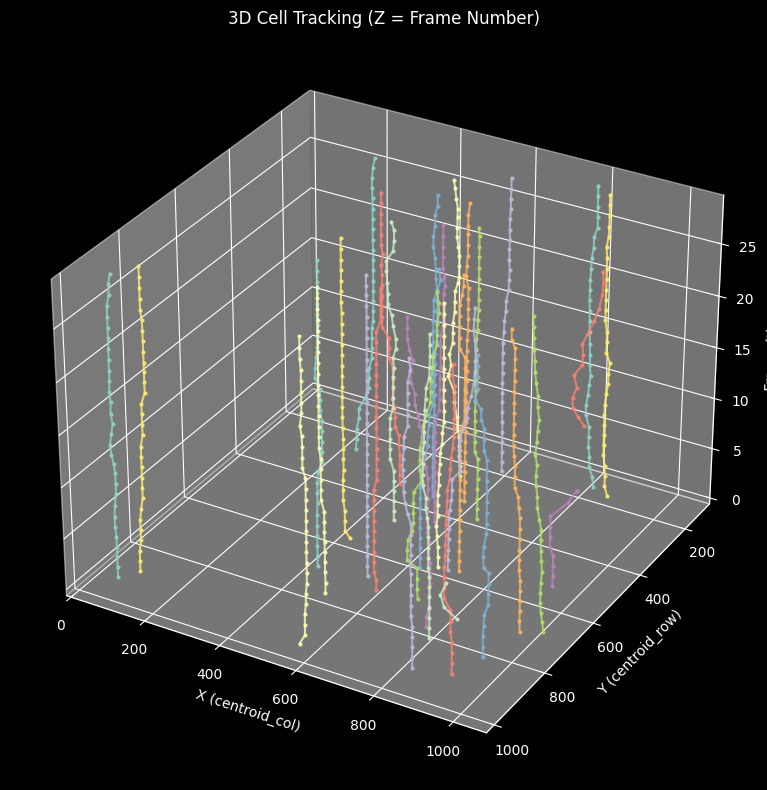

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

# Load the CSV
df = pd.read_csv(df_path + "/all_data_df.csv")

# Setup 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Labels
ax.set_xlabel("X (centroid_col)")
ax.set_ylabel("Y (centroid_row)")
ax.set_zlabel("Frame (time)")

# Invert Y axis so it matches image orientation
ax.invert_yaxis()

# Loop through each unique cell (seg_label)
labels = df["seg_label"].unique()

for l in labels:
    track = df[df["seg_label"] == l].sort_values("frame_num")

    xs = track["centroid_col"].values
    ys = track["centroid_row"].values
    zs = track["frame_num"].values

    # plot as a 3D line (trail) with markers
    ax.plot(xs, ys, zs, marker="o", markersize=2, alpha=0.8)

plt.title("3D Cell Tracking (Z = Frame Number)")
plt.tight_layout()
plt.savefig("graph3D")
plt.show()


In [ ]:
!cp "/content/graph3D.png" "{VISUALISATION_FOLDER}/3D_graph.png"

## 3D visual with progress

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import matplotlib.cm as cm
import matplotlib.colors as mcolors



# ---------- CONFIG ----------
CSV_PATH = df_path + "/all_data_df.csv"

IMG_FOLDER = "temp"
try:
  IMG_FOLDER = frames_path
except:
  IMG_FOLDER = os.path.join(DATA_FOLDER, "01")

OUT_MP4 = "3d_building.mp4"
FPS = 15
DOWNSAMPLE = 0          # higher = faster, blurrier
MAX_LABELS_TO_PLOT = None
# ----------------------------


df = pd.read_csv(CSV_PATH)
frame_numbers = sorted(df["frame_num"].unique().astype(int))
min_frame, max_frame = frame_numbers[0], frame_numbers[-1]

# preload downsampled images
images = {}
first_img_shape = None
for f in frame_numbers:
    fname = os.path.join(IMG_FOLDER, f"t{int(f):03d}.tif")
    img = Image.open(fname).convert("RGB")
    if DOWNSAMPLE > 1:
        img = img.resize((img.width // DOWNSAMPLE, img.height // DOWNSAMPLE), Image.BILINEAR)
    arr = np.asarray(img).astype(np.float32) / 255.0
    images[int(f)] = arr
    if first_img_shape is None:
        first_img_shape = arr.shape

H, W = first_img_shape[0], first_img_shape[1]
Z_MAX = max_frame

labels = np.unique(df["seg_label"])
if MAX_LABELS_TO_PLOT is not None:
    labels = labels[:MAX_LABELS_TO_PLOT]
if DOWNSAMPLE > 1:
    df["centroid_col"] = pd.to_numeric(df["centroid_col"]) / DOWNSAMPLE
    df["centroid_row"] = pd.to_numeric(df["centroid_row"]) / DOWNSAMPLE
df["frame_num"] = pd.to_numeric(df["frame_num"])


# --- assign each label a consistent color ---
cmap = cm.get_cmap("tab20", len(labels))   # 20 distinct colors, cycles if >20
label_to_color = {}
for i, lab in enumerate(labels):
    rgba = cmap(i)
    rgb = tuple(int(255 * c) for c in rgba[:3])  # (R,G,B) in 0–255
    label_to_color[lab] = rgb



def track_up_to(label, frame_t):
    s = df[(df["seg_label"] == label) & (df["frame_num"] <= frame_t)].sort_values("frame_num")
    if s.empty:
        return None
    return s["centroid_col"].values, s["centroid_row"].values, s["frame_num"].values

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
canvas = FigureCanvas(fig)

def render_frame(frame_t):

  #  z_mult stretches the graph so it is tall enough to see
  #  data properly

    z_mult = 0

    if Z_MAX > 50:
      z_mult = 15
    else:
      z_mult = 35

    ax.cla()
    ax.set_xlim(0, W)
    ax.set_ylim(H, 0)
    ax.set_zlim(min_frame - 1, Z_MAX + 1)
    try:
        ax.set_box_aspect((W, H, Z_MAX * z_mult + 1))
    except:
        pass


    # prepare OpenCV-friendly BGR image for annotation
    img_2d = (images[frame_t] * 255).astype(np.uint8).copy()
    img_2d = cv2.cvtColor(img_2d, cv2.COLOR_RGB2BGR)

    # prepare OpenCV-friendly BGR image for annotation
    img_2d = (images[frame_t] * 255).astype(np.uint8).copy()
    img_2d = cv2.cvtColor(img_2d, cv2.COLOR_RGB2BGR)

    # annotate tracks on the 2D image
    for lab in labels:
        tr = track_up_to(lab, frame_t)
        if tr is None:
            continue
        xs_tr, ys_tr, zs_tr = tr
        color_bgr = label_to_color[lab][::-1]  # convert RGB→BGR
        pts = [(int(x), int(y)) for x, y in zip(xs_tr, ys_tr)]
        for i in range(1, len(pts)):
            cv2.line(img_2d, pts[i-1], pts[i], color_bgr, 1, cv2.LINE_AA)
        cv2.circle(img_2d, pts[-1], 3, color_bgr, -1)

    # convert back to float RGB for Matplotlib (since plot_surface expects RGB in [0,1])
    img_annot_rgb = cv2.cvtColor(img_2d, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0

    # plot only current image plane (using annotated version now)
    ys = np.arange(0, H)
    xs = np.arange(0, W)
    X, Y = np.meshgrid(xs, ys)
    Z = np.full_like(X, frame_t, dtype=np.float32)
    ax.plot_surface(
        X, Y, Z,
        facecolors=img_annot_rgb,
        rstride=8, cstride=8,
        shade=False, alpha=0.9
    )


    # plot tracks
    for lab in labels:
        tr = track_up_to(lab, frame_t)
        if tr is None:
            continue
        xs_tr, ys_tr, zs_tr = tr
        if len(xs_tr) >= 2:
            ax.plot(xs_tr, ys_tr, zs_tr, linewidth=1)
        ax.scatter(xs_tr[-1], ys_tr[-1], zs_tr[-1], s=20)



    ax.set_title(f"Frame {frame_t}/{Z_MAX}")

    canvas.draw()
    buf = np.asarray(canvas.buffer_rgba())
    return buf[:, :, :3]

# render first to get size
test_frame = render_frame(frame_numbers[0])
h, w = test_frame.shape[:2]

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
writer = cv2.VideoWriter(OUT_MP4, fourcc, FPS, (w, h))

for f in frame_numbers:
    print(f"Rendering {f}/{Z_MAX}")
    rgb = render_frame(f)
    bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
    writer.write(bgr)

writer.release()
print("Saved video:", OUT_MP4)


# ---------- 360° rotation after final frame ----------
ROT_OUT = "3d_rotation.mp4"
N_ROT_FRAMES = 60   # more frames = smoother rotation
ELEV = 20            # vertical viewing angle
FPS_ROT = N_ROT_FRAMES / 5

# re-use the same fig/ax/canvas
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
writer_rot = cv2.VideoWriter(ROT_OUT, fourcc, FPS_ROT, (w, h))

# keep the last plotted scene (so you see all tracks & annotated planes)
for i in range(N_ROT_FRAMES):
    azim = 360 * i / N_ROT_FRAMES
    ax.view_init(elev=ELEV, azim=azim)
    canvas.draw()
    buf = np.asarray(canvas.buffer_rgba())
    rgb = buf[:, :, :3]
    bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
    writer_rot.write(bgr)
    print(f"Rendering {i}/{Z_MAX}")


writer_rot.release()
print("Saved rotation video:", ROT_OUT)



In [ ]:
!cp "/content/{OUT_MP4}" "{VISUALISATION_FOLDER}/3D_cell_tracking.mp4"
!cp "/content/{ROT_OUT}" "{VISUALISATION_FOLDER}/3D_cell_tracking_spinning.mp4"